<a href="https://colab.research.google.com/github/khaqanashraf/video-scraping/blob/master/scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import urllib
from bs4 import BeautifulSoup
# from pytube import YouTube
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# the function scrap frames from an image
def get_frames_from_video(video_path , delay):
    
    """
        video_path is the path to the video with video formate
        e.g '/content/gdrive/My Drive/videos/video.mp4'


        delay is the parameter to fetch a frame from video after a certain delay
        like you want to fetch each frame after 5 seconds


        it will return each frame fetched from the video given by video_path after 
        each delay given by 'delay' parameter in numpy
    
    """
        

    
    vidcap = cv2.VideoCapture(video_path)
    success,image = vidcap.read()
    count = 0
    frames = list()
    fps = int(vidcap.get(cv2.CAP_PROP_FPS))
    i = 0
    while success: 
        frames.append(image)
        success,image = vidcap.read()

        print(f'Read a new frame{i}: ', success)
        count += delay*fps
        i+=1
        vidcap.set(1, count)
    return  np.array(frames)


def scrap_faces_from_image(image, cascade_path):

    """
          image: is the numpy multidimensional array having pixel values of images at location

          cascade_path: it is a complete path to an xml document. 
          this xml document contains real values of pretrained model.
          for scraping of faces we can use cascade_frontalface_default or any other varient.
          the related pre trained values can be found at 'https://github.com/opencv/opencv/tree/master/data/haarcascades'

          it will return boxes e.i coordinates of faces detected in the image
          there could be more than one face
          each face is coordinated with x,y,w,h (x and y are the left top corner of the box whereas 'w' is the width of the box and 'h' is the height of the box)
    
    """

    face_cascade = cv2.CascadeClassifier(cascade_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return faces

def crop_faces_from_image(faces, img):

    """
          faces: is the numpy multidimensional array containing coordinates of each faces the image contained
          each face box can be expressed as the following tuple (x,y,w,h)

          img: is the image containing some faces


          return: the function return a multidiemnsional numpy array containg cropped faces according to given coordinates in 'faces'
    """

    face_images = list()
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face_image = img[y:y+h, x:x+w]
        face_images.append(face_image)

    return np.array(face_images)

In [0]:
# the complete path where the video is located
video_path = '/content/gdrive/My Drive/videos/ehde_wafa.mp4'
# the directory where I want to save my scrapped faces images
directory = '/content/gdrive/My Drive/videos/ehde_wafa'
# complete path to where pretrained cascade xml file resides
cascade_path = '/content/gdrive/My Drive/videos/haarcascade_frontalface_default.xml'
# interval after which the frame would be fetched
delay = 5

In [51]:
# getting all frames from the vide
frames = get_frames_from_video(video_path, delay)
frames.shape

Read a new frame0:  True
Read a new frame1:  True
Read a new frame2:  True
Read a new frame3:  True
Read a new frame4:  True
Read a new frame5:  True
Read a new frame6:  True
Read a new frame7:  True
Read a new frame8:  True
Read a new frame9:  True
Read a new frame10:  True
Read a new frame11:  True
Read a new frame12:  True
Read a new frame13:  True
Read a new frame14:  True
Read a new frame15:  False


(16, 720, 1280, 3)

In [0]:

croped_faces = list()
for frame in frames:
    # find coordinates of faces contained by this frame
    faces = scrap_faces_from_image(frame, cascade_path)
    # slice the area of the frame where the face is by given coordinates
    croped_faces.extend(crop_faces_from_image(faces, frame))

croped_faces = np.array(croped_faces)

In [0]:
i = 0
for face in croped_faces:
    # convert faces to gray scale
    gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    # save these cropped gray scale face images to the directory in jpg format
    cv2.imwrite(f'{directory}/face{i}.jpg', gray)
    i += 1

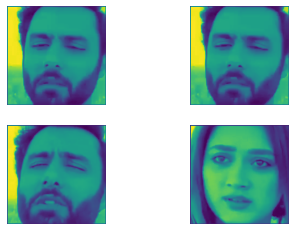

In [58]:
n_grid = 2
i = 1
for face in croped_faces:
    if i>4:
        break
    gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    plt.subplot(n_grid,n_grid, i)
    plt.imshow(gray)
    plt.axis('off')
    i+=1
    